# Example 1. Advertising data

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = pd.read_csv('../Data/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Advertising dataset contains information about the sales of a product in different markets, along with the advertising budget for the product in each market.   
The dataset includes 200 instances with **3 features**, such as the TV advertising budget, the radio advertising budget, and the newspaper advertising budget.

The target variable is the sales of the product, which is also a **continuous** variable.

## Select two features (columns) from a DataFrame

### Method 1: Using Double Brackets 

- You can select multiple columns from a DataFrame by passing a list of column names within double brackets.  

In [3]:
df_new = df[['TV', 'Sales']]
df_new.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


### Method 2: Using `iloc`
- You can also select features based on their integer index positions using `iloc`.   
- This method is particularly useful when you want to select columns at specific intervals or ranges.

In [4]:
df_new = df.iloc[:, 1::3]
df_new.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


### Method 3: Using the filter Method
- Another way to select multiple columns is by using the `filter()` method, which allows for more flexible selection options.

In [5]:
# Select two features using filter method  
df_new = df.filter(items=['TV', 'Sales'])
df_new.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [6]:
type(df_new)

pandas.core.frame.DataFrame

## Convert to NumPy array and then create `X`, and `y`

### **Method 1**: Using `to_numpy()`

In [7]:
dataset = df_new.to_numpy()  

# Extract the first and second columns (feature, and label) and reshape  
x = dataset[:, 0].reshape(-1, 1)  
y = dataset[:, 1].reshape(-1, 1)
x.shape, y.shape

((200, 1), (200, 1))

###  **Method 2**: Using `values` Attribute

In [8]:
dataset = df_new.values  

x = dataset[:, 0].reshape(-1, 1)  
y = dataset[:, 1].reshape(-1, 1)
x.shape, y.shape

((200, 1), (200, 1))

### **Method 3**: Using `np.array()`

In [9]:
dataset = np.array(df_new)

x = dataset[:, 0].reshape(-1, 1)
y = dataset[:, 1].reshape(-1, 1)
x.shape, y.shape

((200, 1), (200, 1))

### **Method 4**: One-Line Selection and Reshape

In [10]:
import numpy as np  

x = df_new.iloc[:, 0].to_numpy().reshape(-1, 1)  
y = df_new.iloc[:, 1].to_numpy().reshape(-1, 1)

x.shape, y.shape

((200, 1), (200, 1))

## Split the Data into Training and Testing Sets

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 1)
(160, 1)
(40, 1)
(40, 1)


## Visualization

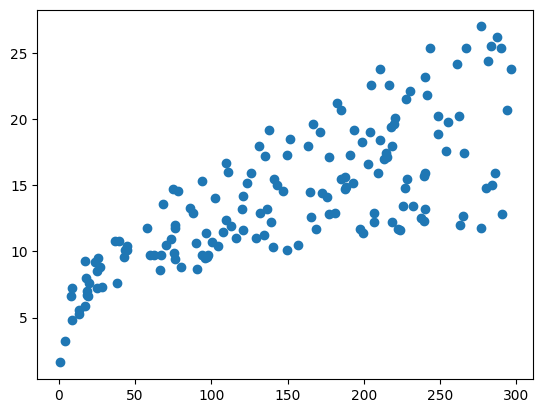

In [13]:
plt.scatter(x_train, y_train);

## Hypothesis function

In the context of univariate linear regression, where we work with a single feature, the equation representing the relationship between the independent variable and the dependent variable can be expressed as the **hypothesis function**:

**ŷ = β₀ + β₁x**

In this equation:

- **ŷ** (y-hat): Represents the predicted value of the dependent variable, also known as the model output or response variable.
  
- **x**: Denotes the independent variable, often referred to as the input or predictor variable.

- **β₀** (beta-zero): This is the y-intercept of the regression line, sometimes called the **bias** term.   
    It signifies the point where the line crosses the y-axis. A higher value for β₀ raises the entire line, while a lower value pushes it down.

- **β₁** (beta-one): This represents the coefficient (or **weight**) associated with the independent variable x.   
    It determines the slope of the regression line  
    a larger β₁ results in a steeper line, whereas a smaller β₁ yields a flatter line.

- Both **β₀** and **β₁** are considered model parameters, which are estimated during the training process to best fit the data.

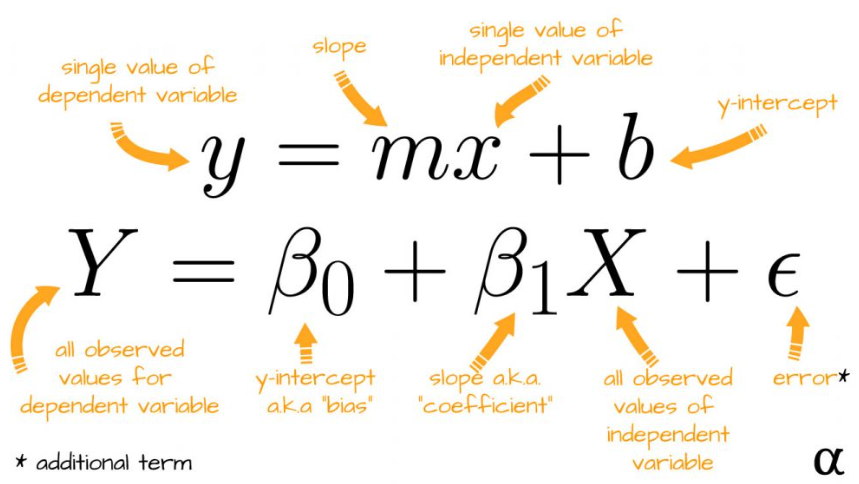

## Plotting regression line with random numbers

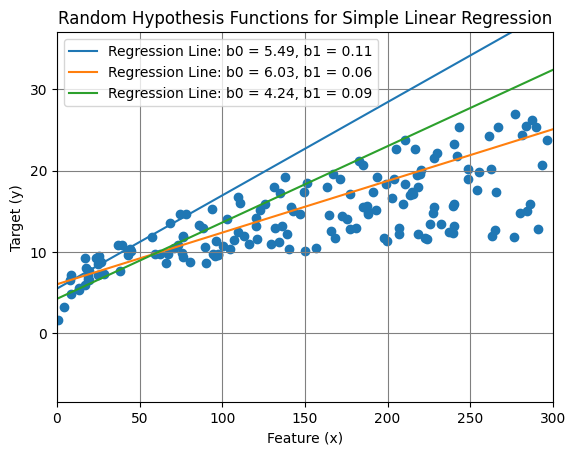

In [14]:
import numpy as np  
import matplotlib.pyplot as plt  

plt.scatter(x_train, y_train) 
x = np.linspace(0, 300, 100)  
np.random.seed(0)  


for _ in range(3):  
    # Randomly generate b0 (intercept) and b1 (slope)  
    b0 = np.random.uniform(0, 10)      
    b1 = np.random.uniform(-0.1, 0.2)  
    y_hat = b0 + b1 * x  

    # Regression line  
    plt.plot(x, y_hat, label=f'Regression Line: b0 = {b0:.2f}, b1 = {b1:.2f}')  

# Plot settings  
plt.title('Random Hypothesis Functions for Simple Linear Regression')  
plt.xlabel('Feature (x)')  
plt.ylabel('Target (y)')  
plt.grid(color='gray')   
plt.legend()   

plt.xlim(0, 300)  
plt.ylim(min(y_train) - 10, max(y_train) + 10)   

plt.show()

## Create and Train the Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [16]:
model.coef_, model.intercept_

(array([[0.04652973]]), array([7.11963843]))

## Make Predictions
- After fitting the model, we can make predictions on the test data.

In [17]:
y_pred = model.predict(x_test)

## Evaluate the Model
Let's evaluate the performance of our model using Mean Squared Error `(MSE)` and `R-squared` score.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score 

mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f'Mean Squared Error: {mse:.2f}')  
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 10.20
R-squared Score: 0.68


## Visualize the Results

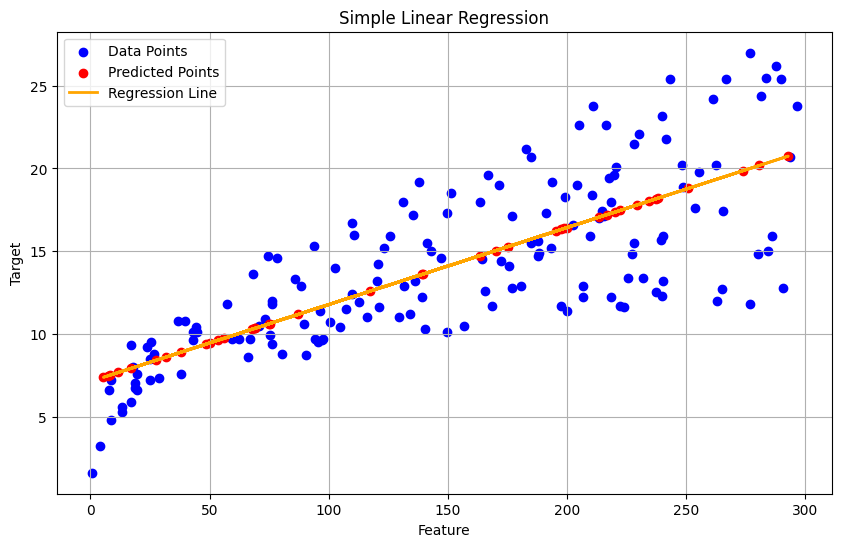

In [19]:
plt.figure(figsize=(10, 6))  
plt.scatter(x_train, y_train, color='blue', label='Data Points')  
plt.scatter(x_test, y_pred, color='red', label='Predicted Points')  
plt.plot(x_test, y_pred, color='orange', linewidth=2, label='Regression Line')  
plt.title('Simple Linear Regression')  
plt.xlabel('Feature')  
plt.ylabel('Target')  
plt.legend()  
plt.grid()  
plt.show()

# Example 2: Automobile price prediction

## Step 1: Import Libraries

In [20]:
# Import necessary libraries  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import mean_squared_error, r2_score  

## Step 2: Load the Data

In [21]:
df = pd.read_csv('../Data/Regression/Automobile_data.csv')  
df.head() 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## Step 3: Select and Rename Relevant Columns
- Filter to select the relevant columns: `engine-size` and `price`.

In [22]:
df = df[['engine-size', 'price']]
df = df.rename(columns={"engine-size": "engine_size"})
df.head()

,engine_size,price
0,130,13495
1,130,16500
2,152,16500
3,109,13950
4,136,17450


## Step 4: Check Data Types

In [23]:
print(df.dtypes)

engine_size     int64
price          object
dtype: object


## Step 5: Convert to Numeric

- If the columns contain numeric data in string format (**price**), convert them to numeric, handling any non-numeric cases by **coercing** them to NaN.

In [24]:
df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')  
df['price'] = pd.to_numeric(df['price'], errors='coerce')

print(df.dtypes)

engine_size      int64
price          float64
dtype: object


## Step 6: Handle Missing Values

In [25]:
print(df.isnull().sum())  

engine_size    0
price          4
dtype: int64


### Option 1: Drop rows with NaN values  

In [26]:
df.dropna(inplace=True)  
print(df.isnull().sum())  

engine_size    0
price          0
dtype: int64


### Option 2: Fill missing values, if appropriate

In [27]:
mean_engine_size = df['engine_size'].mean()
mean_price = df['price'].mean()

df.fillna(value={'engine_size': mean_engine_size, 'price': mean_price}, inplace=True)
print(df.isnull().sum()) 

engine_size    0
price          0
dtype: int64


## Step 7: Exploratory Data Analysis (EDA)

### 1. Plot the Data:
- Visualize the relationship between `engine_size` and `price` using a scatter plot.

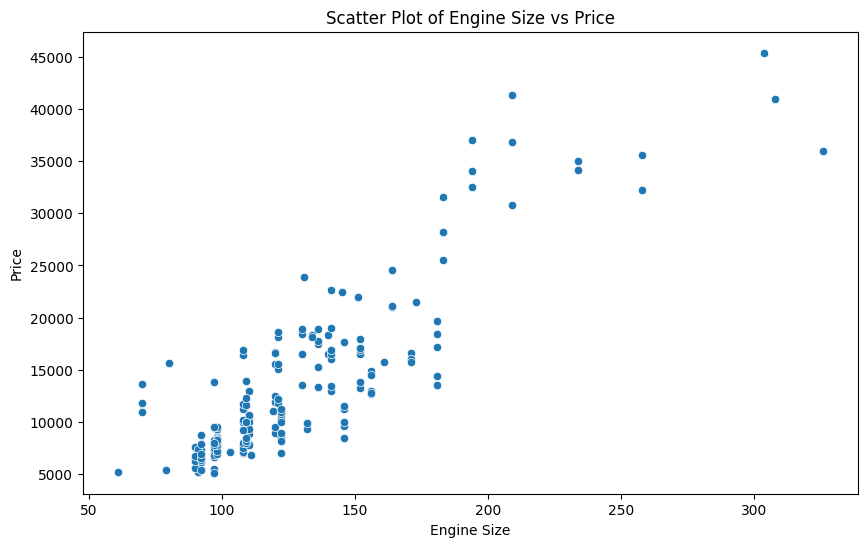

In [28]:
import seaborn as sns

plt.figure(figsize=(10, 6))  
sns.scatterplot(data=df, x='engine_size', y='price')  
plt.title('Scatter Plot of Engine Size vs Price')  
plt.xlabel('Engine Size')  
plt.ylabel('Price')  
plt.show()

### 2. Check Summary Statistics:
- Get an overview of the data.

In [29]:
print(df.describe())

       engine_size         price
count   201.000000    201.000000
mean    126.875622  13207.129353
std      41.546834   7947.066342
min      61.000000   5118.000000
25%      98.000000   7775.000000
50%     120.000000  10295.000000
75%     141.000000  16500.000000
max     326.000000  45400.000000


## Step 8: Prepare for Univariate Linear Regression

### 1. Define Your Features and Target Variable:

In [30]:
X = df[['engine_size']].values.reshape(-1, 1)  
y = df['price'].values.reshape(-1, 1)        

### 2. Split the Data into train and test

In [31]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 1), (41, 1), (160, 1), (41, 1))

## Step 9: Standardize the Features and Target Variable  

In [33]:
X_scaler = StandardScaler()  
y_scaler = StandardScaler()  

X_train_scaled = X_scaler.fit_transform(X_train)  
X_test_scaled = X_scaler.transform(X_test)  

y_train_scaled = y_scaler.fit_transform(y_train) 
y_test_scaled = y_scaler.transform(y_test)

y_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

((160, 1), (41, 1), (160, 1), (41, 1))

## Step 10: Train the Linear Regression Model  

In [34]:
model = LinearRegression()  
model.fit(X_train_scaled, y_train_scaled)  

LinearRegression()

## Step 11: Make Predictions  

In [35]:
y_pred_train_scaled = model.predict(X_train_scaled)  
y_pred_test_scaled = model.predict(X_test_scaled)  

y_pred_train_scaled.min(), y_pred_train_scaled.max()

(-1.3978453947863667, 4.418508357808525)

## Step 12: Inverse Transform the Predictions  

In [36]:
y_pred_train = y_scaler.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()  
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()  

y_pred_train.min(), y_pred_train.max()

(3131.6175992220888, 42419.4977555502)

## Step 13: Evaluate the Model, and Plot   

In [37]:
mse_train = mean_squared_error(y_train, y_pred_train)  
mse_test = mean_squared_error(y_test, y_pred_test)  
r2_train = r2_score(y_train, y_pred_train)  
r2_test = r2_score(y_test, y_pred_test)  

print("Training Mean Squared Error:", mse_train)  
print("Training R² Score:", r2_train)  
print()
print("Testing Mean Squared Error:", mse_test)  
print("Testing R² Score:", r2_test)  

Training Mean Squared Error: 11102199.241255369
Training R² Score: 0.7566712363769901

Testing Mean Squared Error: 33696986.98421673
Testing R² Score: 0.7245780486466742


## Step 14: Plotting the Train and Test Data with the Linear Regression Line  

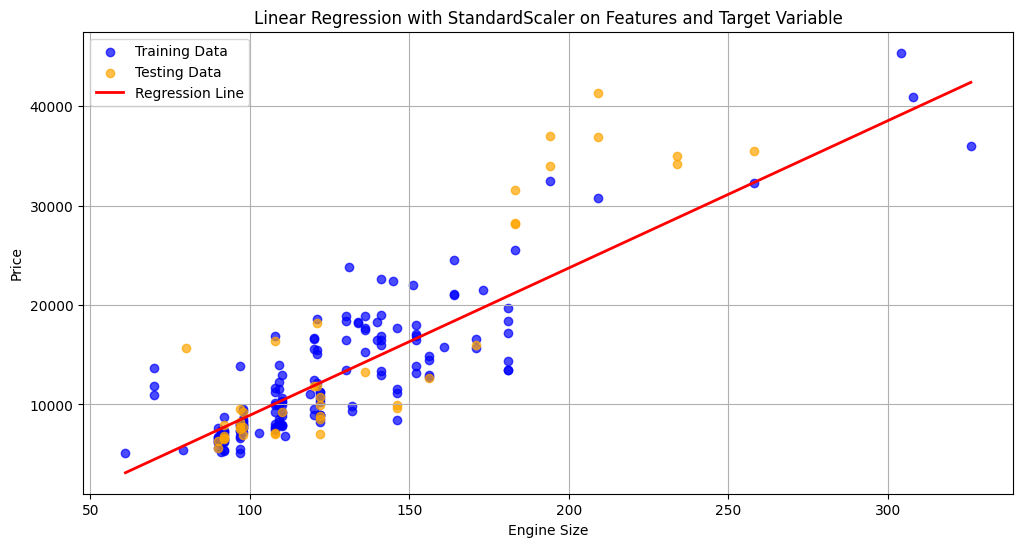

In [41]:
plt.figure(figsize=(12, 6))  

# Scatter Plot for Training and Testing Data  
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)   
plt.scatter(X_test, y_test, color='orange', label='Testing Data', alpha=0.7)  

# Plotting the regression line  
X_line = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)  
X_line_scaled = X_scaler.transform(X_line)  # Scale the line input  
y_line_scaled = model.predict(X_line_scaled)  # Predict the output  
y_line = y_scaler.inverse_transform(y_line_scaled.reshape(-1, 1)).flatten()  # Inverse transform to original scale  

plt.plot(X_line, y_line, color='red', label='Regression Line', linewidth=2)  

# Add titles and labels  
plt.title('Linear Regression with StandardScaler on Features and Target Variable')  
plt.xlabel('Engine Size')  
plt.ylabel('Price')  
plt.legend()  
plt.grid()  
plt.show()  